In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import acf

In [3]:
df_raw = pd.read_csv('./../data/weather_dataset_preprocesado.csv', index_col='datetime', parse_dates=True)

# Análisis exploratorio de los datos

In [4]:
df_raw.sample(15)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2014-06-12 21:00:00,997.28,17.35,290.74,10.22,62.90,19.84,12.48,7.36,7.82,12.51,1190.21,0.89,3.86,37.69
2013-09-02 21:00:00,995.69,17.96,291.48,12.95,72.50,20.62,14.95,5.67,9.39,15.01,1184.70,1.59,4.40,256.70
2014-08-12 10:00:00,986.84,18.74,293.01,10.08,57.09,21.65,12.36,9.29,7.83,12.53,1172.14,5.58,8.71,213.50
2010-06-17 23:00:00,987.12,15.48,289.71,7.86,60.39,17.61,10.64,6.98,6.73,10.78,1186.51,0.75,1.28,347.00
2011-04-28 10:00:00,988.25,14.65,288.78,10.16,74.40,16.70,12.42,4.27,7.86,12.57,1190.48,1.50,2.36,100.60
2009-04-03 08:00:00,991.71,7.27,281.10,3.13,74.90,10.22,7.65,2.56,4.81,7.72,1228.35,1.19,1.75,180.10
2009-05-22 19:00:00,989.11,14.18,288.24,8.56,68.86,16.20,11.15,5.04,7.04,11.28,1194.05,1.81,2.13,259.80
2010-06-01 21:00:00,985.86,9.97,284.29,9.32,95.70,12.27,11.74,0.53,7.44,11.91,1207.53,0.87,2.22,236.60
2014-06-30 19:00:00,988.63,16.55,290.66,8.87,60.40,18.86,11.39,7.47,7.20,11.52,1183.60,3.50,7.18,266.70


In [5]:
df = df_raw[['T (degC)']]

In [6]:
df = df.bfill()

In [7]:
df.sample(15)

,T (degC)
datetime,
2013-01-21 11:00:00,-6.16
2012-09-14 19:00:00,16.96
2010-09-28 19:00:00,8.84
2012-10-30 04:00:00,2.16
2009-07-28 15:00:00,22.18
2014-02-24 10:00:00,6.49
2010-03-23 09:00:00,7.57
2013-12-19 04:00:00,2.84
2013-03-13 17:00:00,-4.12


<Axes: title={'center': 'Temperature'}, xlabel='Date', ylabel='Temperature (°C)'>

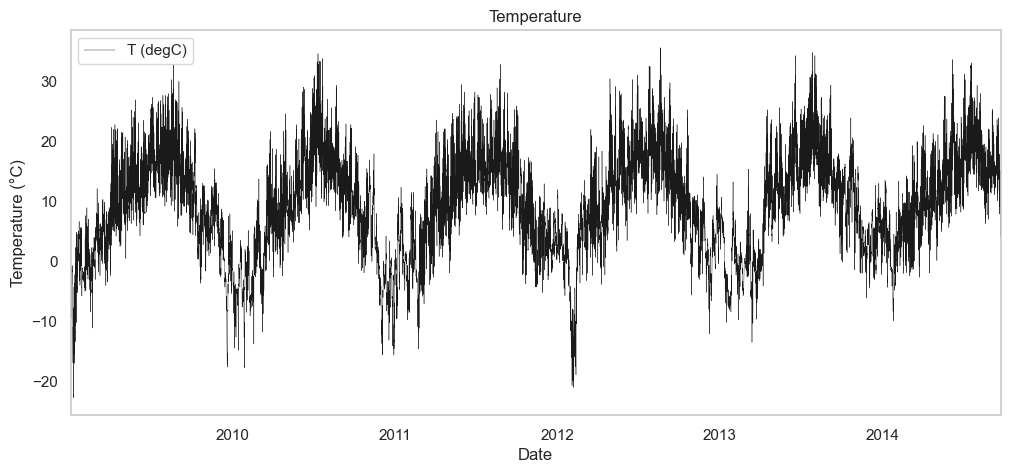

In [18]:
#modifica el texto de la legenda
df.plot(title='Temperature', figsize=(12, 5), color='k', 
        linewidth=0.3, 
        legend=True, 
        xlabel='Date', 
        grid=False,
        ylabel='Temperature (°C)')


In [13]:
target_column = 'T (degC)'

# Descomposición de Hodrick-Prescott

[Text(0, 0.5, 'Temperature')]

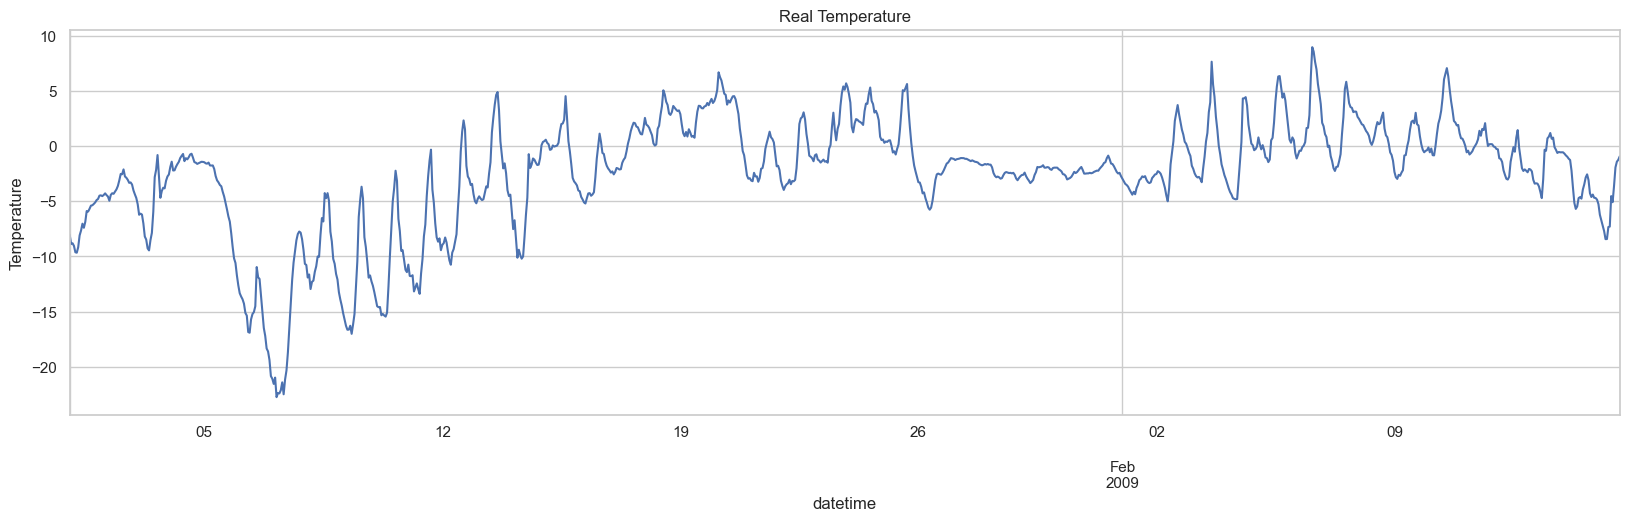

In [19]:
ax = df[target_column].iloc[:1095].plot(title='Real Temperature', figsize=(20, 5))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Temperature')

In [20]:
cycle_100, trend_100 = hpfilter(df[target_column], lamb=100)
cycle_1600, trend_1600 = hpfilter(df[target_column], lamb=1600)
cycle_14400, trend_14400 = hpfilter(df[target_column], lamb=14400)

In [21]:
df = df.assign(
    cycle_100=cycle_100,
    trend_100=trend_100,
    cycle_1600=cycle_1600,
    trend_1600=trend_1600,
    cycle_14400=cycle_14400,
    trend_14400=trend_14400
)

Gráfica de la tendencia, con diferentes valores para lamb (100, 1600, 14400)

<Axes: title={'center': 'Temperature vs. Trend'}, xlabel='datetime'>

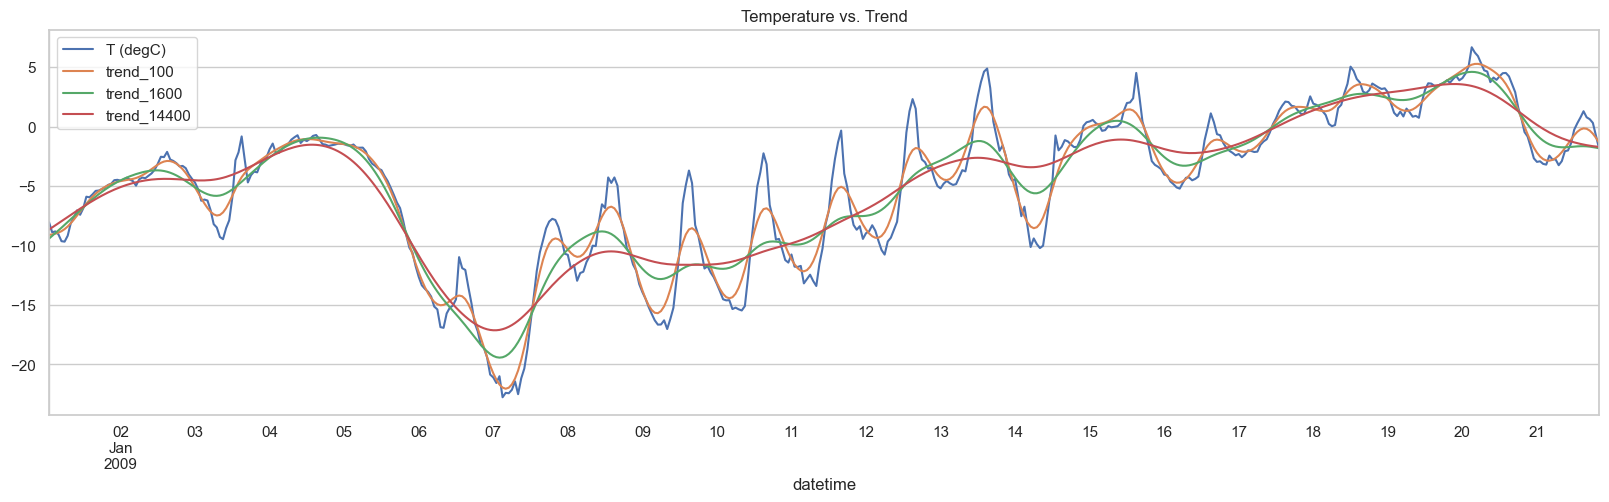

In [30]:
df[[target_column, 'trend_100', 'trend_1600', 'trend_14400']].iloc[:500].plot(title='Temperature vs. Trend', figsize=(20, 5))

Cycle

<Axes: title={'center': 'Temperature vs. Cycle'}, xlabel='datetime'>

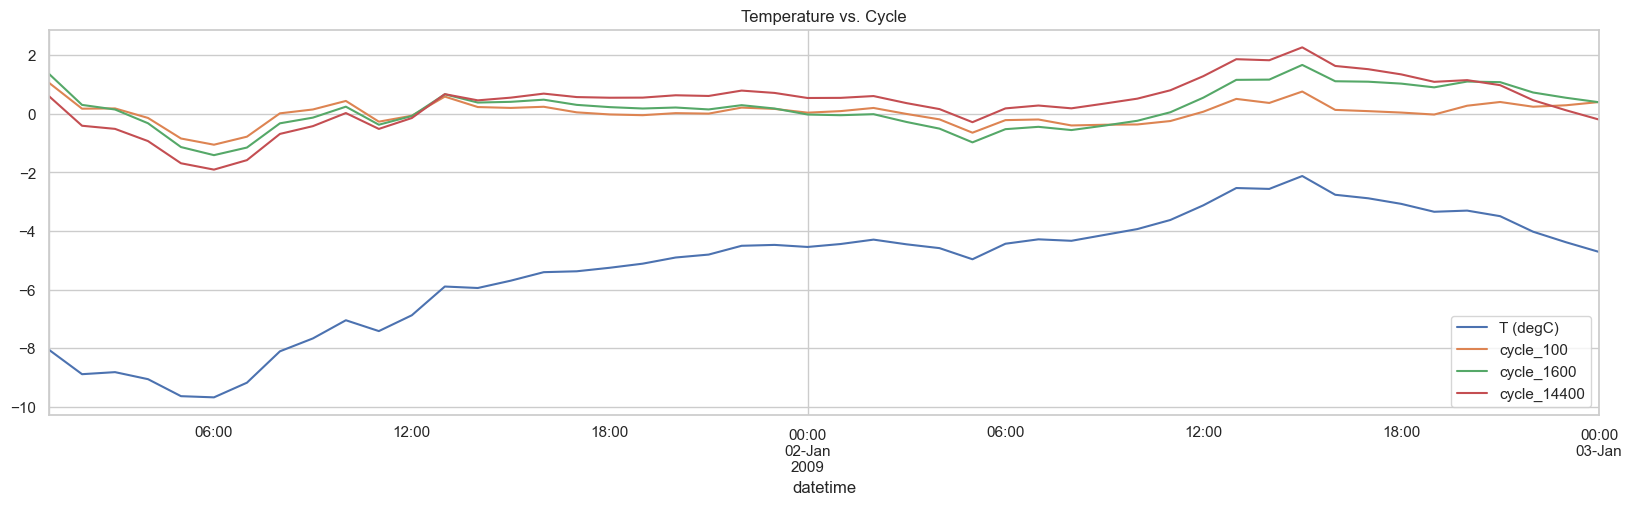

In [29]:
df[[target_column, 'cycle_100', 'cycle_1600', 'cycle_14400']].iloc[:48].plot(title='Temperature vs. Cycle', figsize=(20, 5))

# Descomposición ETS (Error-Trend-Seasonality)

In [34]:
df = df.bfill()

In [35]:
df = df.ffill()

In [36]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y', dayfirst=True)

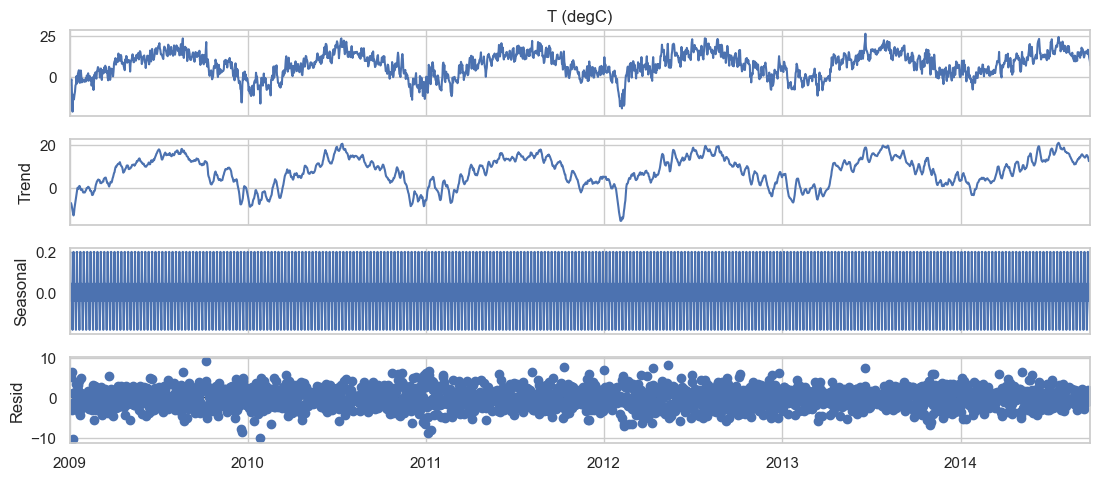

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample and forward fill the DataFrame
df = df.resample('D').ffill()

# Perform seasonal decomposition
result = seasonal_decompose(df[target_column], model='additive')

# Plot the result with the specified figure size
fig = result.plot()
fig.set_size_inches(12, 5)
plt.show()

In [41]:
sts.adfuller(df[target_column])

(np.float64(-3.971652067964437),
 np.float64(0.0015664442443600844),
 14,
 2078,
 {'1%': np.float64(-3.4335008163402327),
  '5%': np.float64(-2.8629318897058345),
  '10%': np.float64(-2.5675109777577276)},
 np.float64(10324.307756986758))

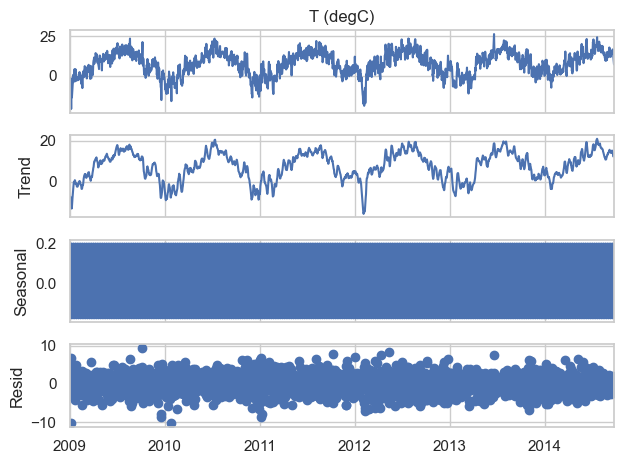

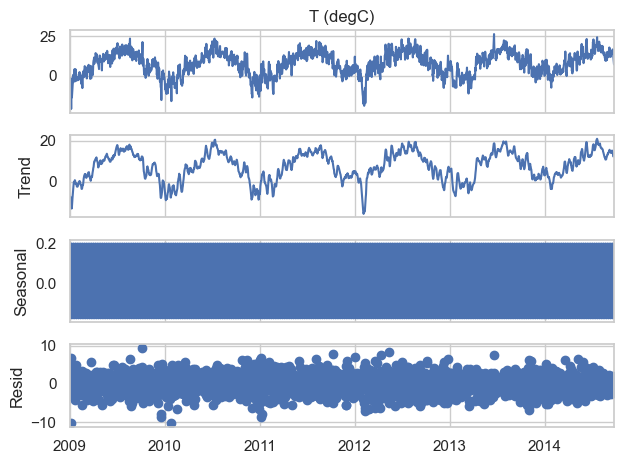

In [39]:
df = df.resample('D').ffill()
result = seasonal_decompose(df[target_column], model='additive')

# plot result
result.plot()

# SMA (Simple Moving Average)

In [17]:
df['12-month-SMA'] = df[target_column].rolling(window = 12).mean().shift(-1)

<Axes: xlabel='Date'>

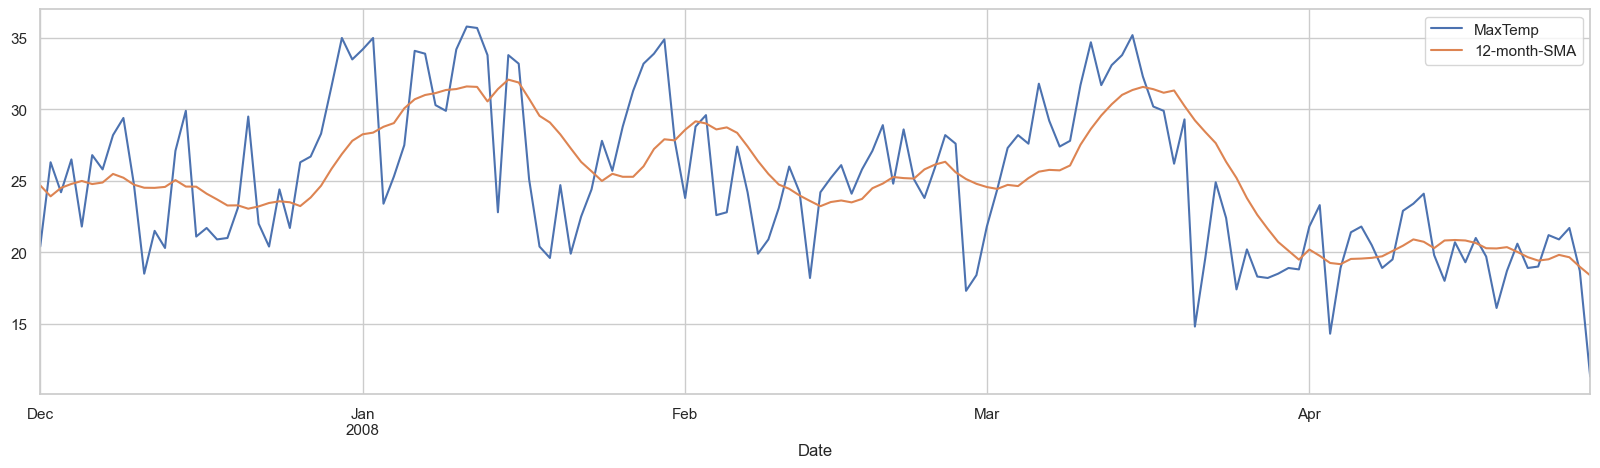

In [18]:
df[[target_column, '12-month-SMA']].iloc[30:180].plot(figsize=(20, 5))

# SES (Simple Exponential Smooting)

In [19]:
span = 12
alpha = 2/(span+1)

In [20]:
df['SES12'] = SimpleExpSmoothing(df[target_column]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

<Axes: title={'center': 'Daily max temperature vs SES12'}, xlabel='Date'>

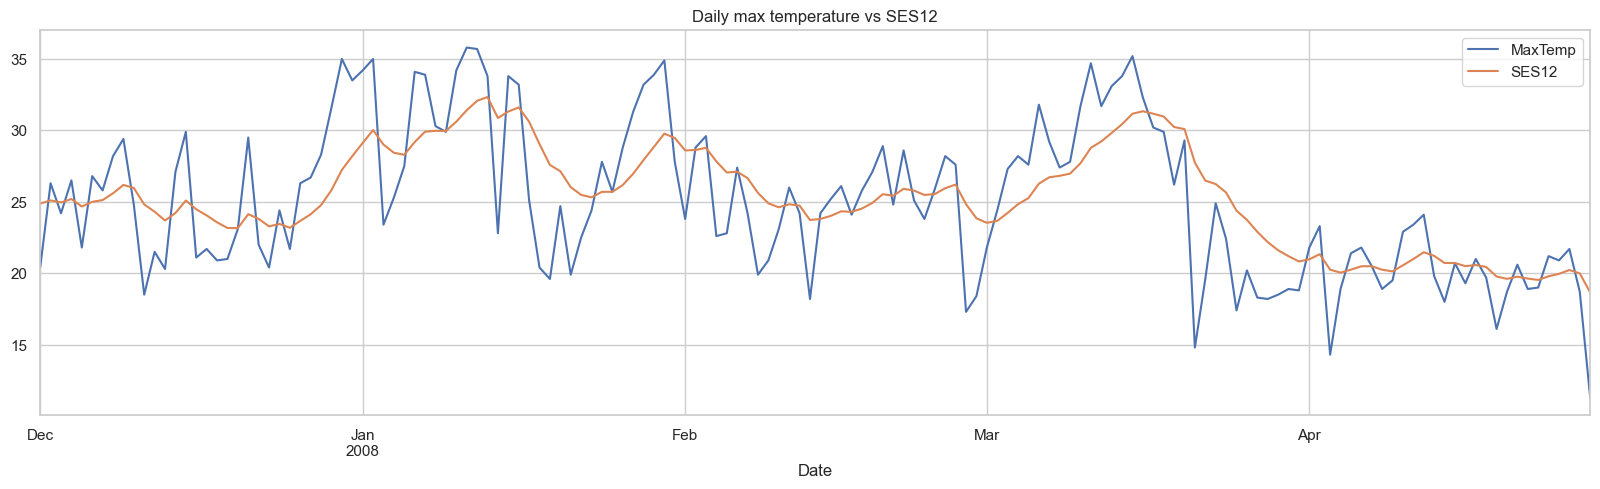

In [21]:
df[[target_column, 'SES12']].iloc[30:180].plot(title='Temperature vs SES12', figsize=(20, 5))

# DES (Double Exponential Smoothing)

In [22]:
df['DESadd'] = ExponentialSmoothing(df[target_column],trend='add').fit().fittedvalues.shift(-1)
df['DESmul'] = ExponentialSmoothing(df[target_column],trend='mul').fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Daily max temperature. DESadd vs DESmul'}, xlabel='Date'>

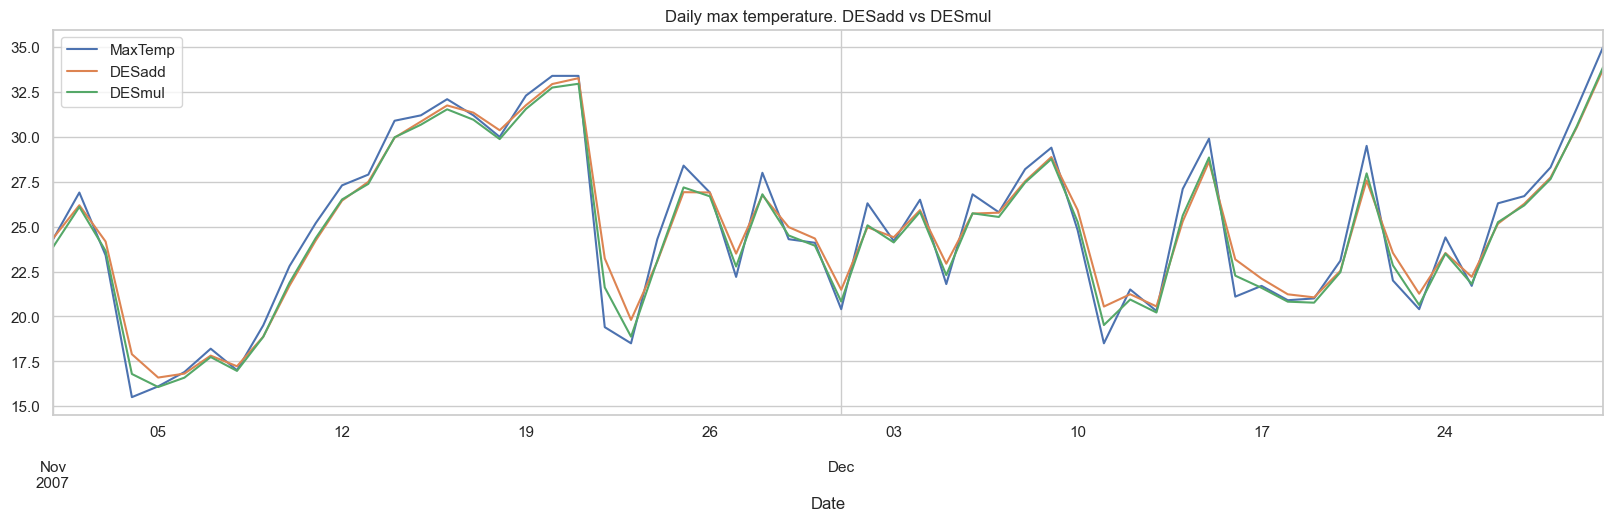

In [23]:
df[[target_column, 'DESadd', 'DESmul']].iloc[:60].plot(title='Temperature. DESadd vs DESmul', figsize=(20,5))

# TES (Triple Exponential Smoothing)

### Additive

<Axes: title={'center': 'Daily max temperature vs TESadd12'}, xlabel='Date'>

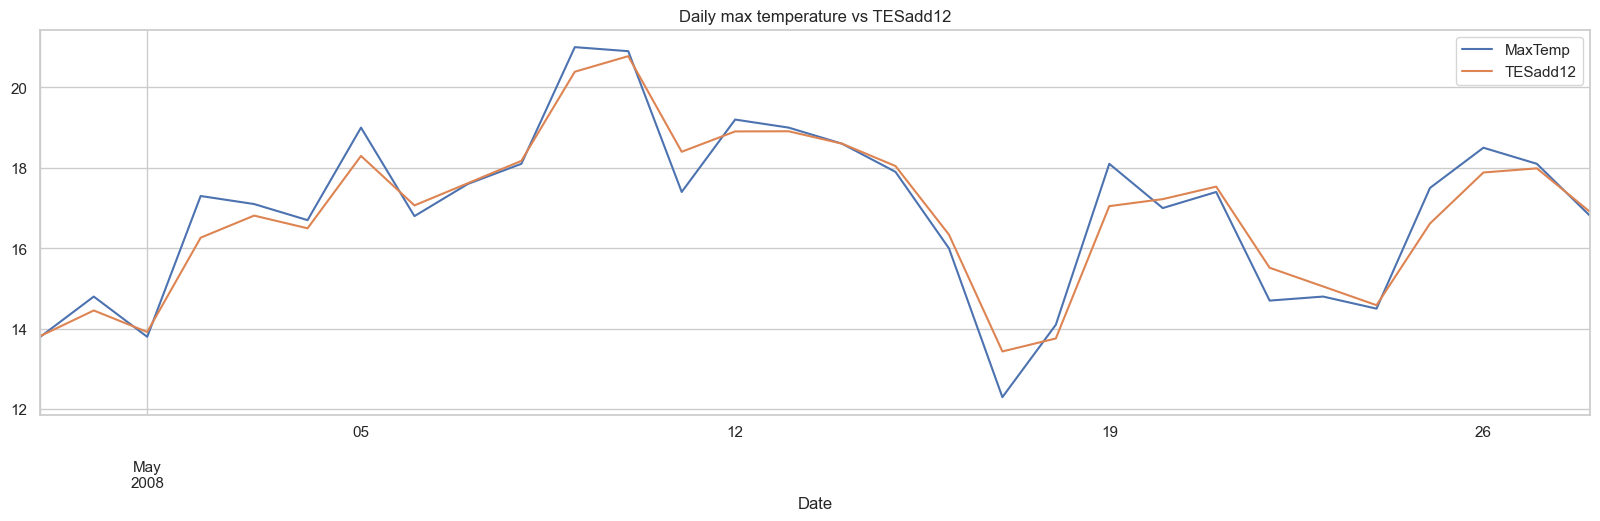

In [24]:
df['TESadd12'] = ExponentialSmoothing(df[target_column],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
df[[target_column, 'TESadd12']].iloc[180:210].plot(title='Temperature vs TESadd12', figsize=(20,5))

### Multiplicative

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Daily max temperature vs TESmul12'}, xlabel='Date'>

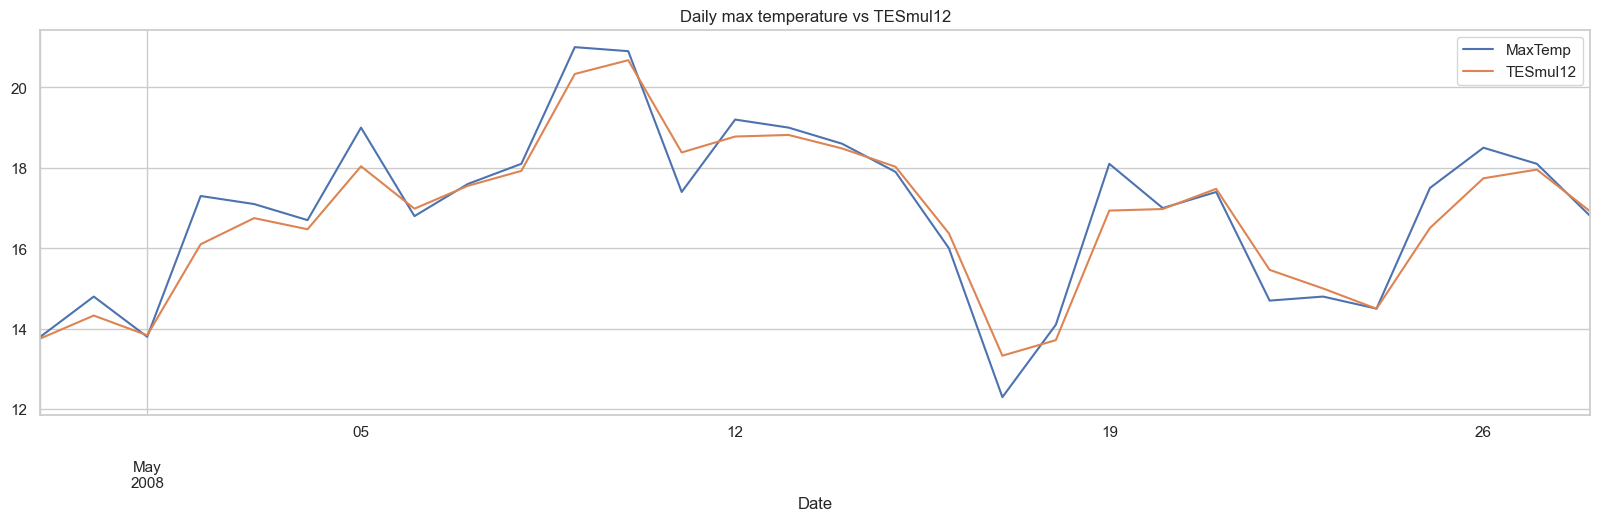

In [25]:
df['TESmul12'] = ExponentialSmoothing(df[target_column],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df[[target_column, 'TESmul12']].iloc[180:210].plot(title='Temperature vs TESmul12', figsize=(20,5))

Comparativa

<Axes: title={'center': 'Daily max temperature. TESadd12 vs TESmul12'}, xlabel='Date'>

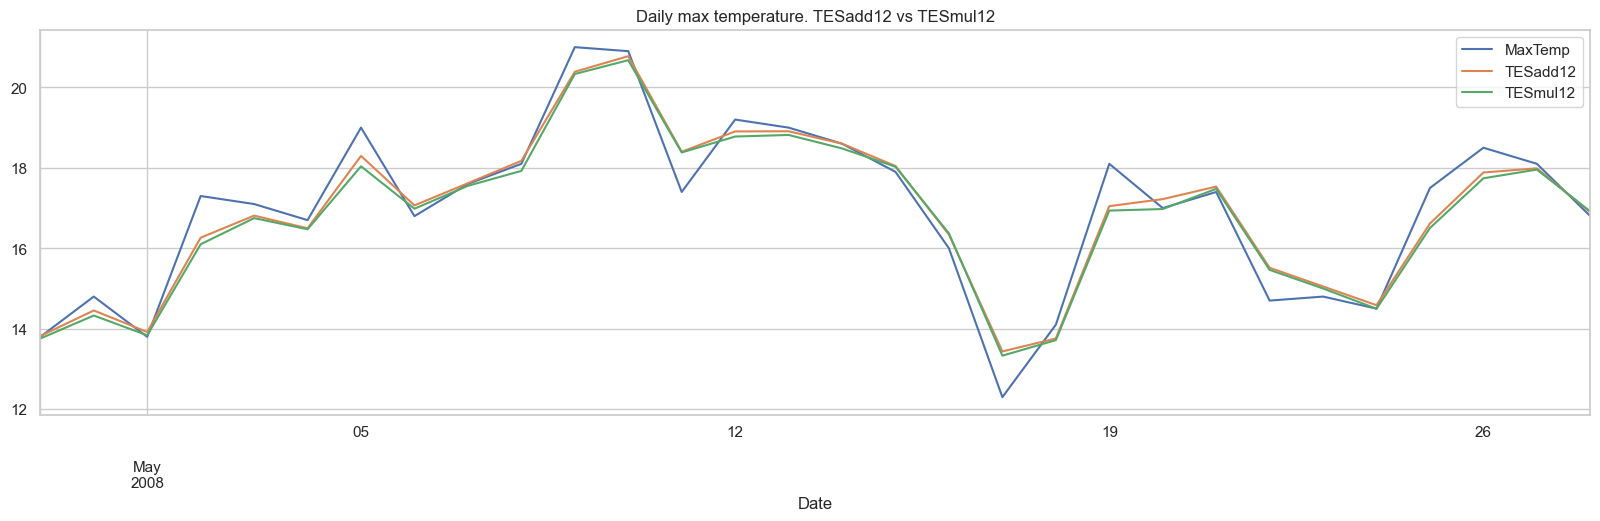

In [26]:
df[[target_column, 'TESadd12', 'TESmul12']].iloc[180:210].plot(title='Temperature. TESadd12 vs TESmul12', figsize=(20, 5))

# Pronósticos (Forecasting)

In [27]:
len(df[target_column])

3525

In [28]:
train_data_len = len(df[target_column]) * 0.8
test_data_len = len(df[target_column]) - train_data_len
df_test = df.iloc[int(train_data_len):]

In [29]:
df_train_data = df.iloc[:int(train_data_len)]
df_test_data = df.iloc[int(train_data_len):]

In [30]:
df_add_fitted_model = ExponentialSmoothing(df_train_data[target_column], trend='add', seasonal='add', seasonal_periods=12).fit()
df_mul_fitted_model = ExponentialSmoothing(df_train_data[target_column], trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [31]:
df_add_test_predictions = df_add_fitted_model.forecast(int(test_data_len)).rename('HW Forecast')
df_mul_test_predictions = df_mul_fitted_model.forecast(int(test_data_len)).rename('HW Forecast')

In [32]:
df_add_test_predictions.sample(15)

2016-10-04    11.754787
2017-03-19    10.768622
2016-08-07    12.380964
2016-06-01    12.676680
2015-09-18    13.614634
2015-07-30    13.399681
2016-02-22    13.187295
2016-03-02    12.577234
2015-09-29    13.425172
2015-11-21    13.586200
2017-05-03    11.397318
2016-11-02    12.307341
2015-10-01    13.735594
2017-04-12    10.677239
2015-09-12    13.598509
Name: HW Forecast, dtype: float64

In [33]:
df.sample(15)

,MaxTemp,cycle_100,trend_100,cycle_1600,trend_1600,cycle_14400,trend_14400,12-month-SMA,SES12,DESadd,DESmul,TESadd12,TESmul12
Date,,,,,,,,,,,,,
2014-05-02,13.9,-1.829885,15.729885,-3.035418,16.935418,-3.893843,17.793843,17.933333,17.840314,14.605751,14.199647,14.878769,14.958139
2013-09-24,23.3,3.456616,19.843384,3.878978,19.421022,3.229341,20.070659,18.283333,18.900355,22.900956,22.967605,22.817598,22.944545
2017-02-12,31.9,-0.318463,32.218463,0.590482,31.309518,0.756643,31.143357,32.508333,33.926358,34.364221,33.379437,34.229918,34.679711
2012-12-27,35.1,2.536385,32.563615,3.766825,31.333175,4.830512,30.269488,35.100000,35.033522,35.095605,34.813776,35.190332,35.799840
2008-08-29,16.2,1.065820,15.134180,1.538520,14.661480,1.494746,14.705254,14.433333,14.331610,15.839295,15.775064,15.760559,15.760716
2011-09-28,15.1,-1.197987,16.297987,-2.502559,17.602559,-3.407774,18.507774,19.208333,18.513510,16.213122,15.738509,16.322624,16.558126
2012-07-26,15.0,1.684310,13.315690,1.685253,13.314747,1.892149,13.107851,13.691667,13.814678,14.732265,14.718088,14.682716,14.771020
2015-10-11,22.1,-3.478496,25.578496,-2.968319,25.068319,-1.505894,23.605894,25.541667,24.115249,23.399689,22.845150,23.664810,23.903262
2015-09-04,16.7,1.414398,15.285602,0.973991,15.726009,0.693825,16.006175,14.783333,14.896922,15.892453,16.027211,16.005537,16.098242


<Axes: xlabel='Date'>

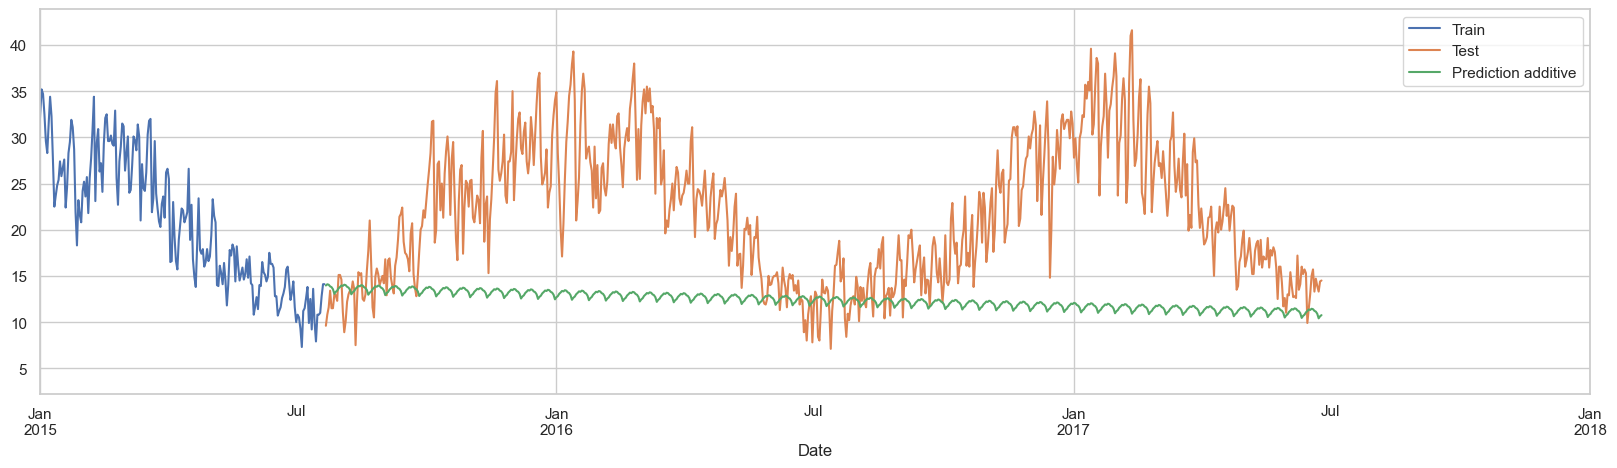

In [34]:
df_train_data[target_column].plot(legend = True, label = 'Train')
df_test_data[target_column].plot(legend = True, label = 'Test')
df_add_test_predictions.plot(legend = True, label = 'Prediction additive', figsize=(20,5), xlim=['2015-01-01','2018-01-01'])

<Axes: xlabel='Date'>

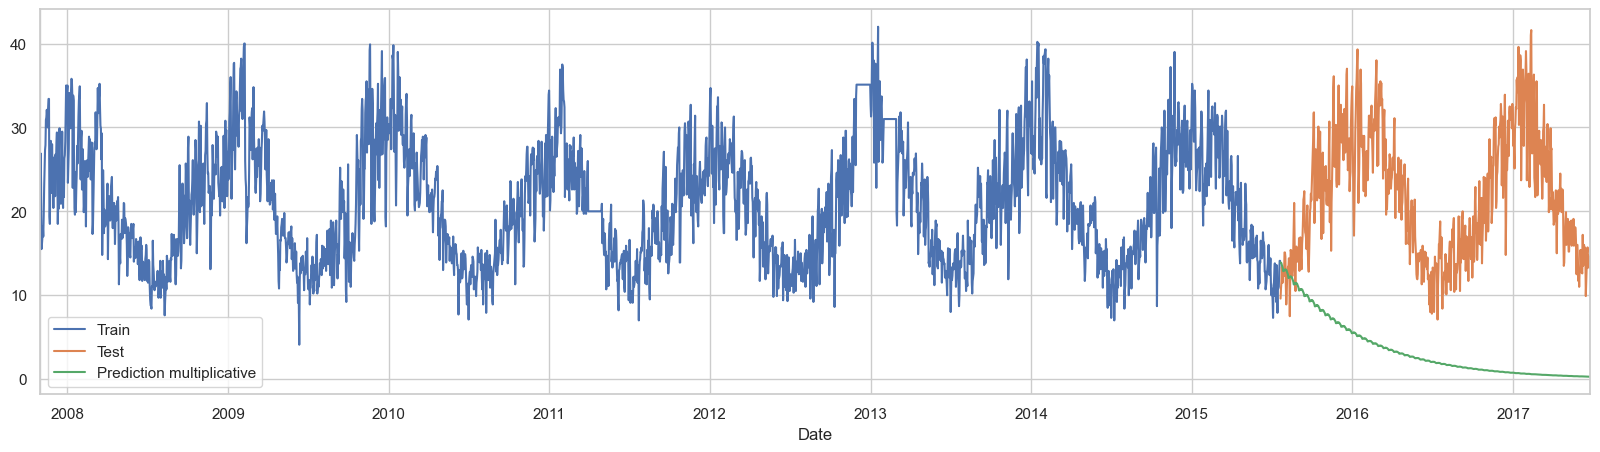

In [35]:
df_train_data[target_column].plot(legend = True, label = 'Train')
df_test_data[target_column].plot(legend = True, label = 'Test')
df_mul_test_predictions.plot(legend = True, label = 'Prediction multiplicative', figsize=(20,5))

# Métricas de evaluación

Additive

In [36]:
mean_absolute_error(df_test_data[target_column], df_add_test_predictions)

np.float64(9.746309338597984)

In [37]:
mean_squared_error(df_test_data[target_column], df_add_test_predictions)

np.float64(144.09669208663342)

Multiplicative

In [38]:
mean_absolute_error(df_test_data[target_column], df_mul_test_predictions)

np.float64(18.41439455939061)

In [39]:
mean_squared_error(df_test_data[target_column], df_mul_test_predictions)

np.float64(406.8487713706754)

# Estacionaridad

In [40]:
sts.adfuller(df[target_column])

(np.float64(-3.517790964604335),
 np.float64(0.007541768793426983),
 17,
 3507,
 {'1%': np.float64(-3.4322160088068467),
  '5%': np.float64(-2.8623644968791626),
  '10%': np.float64(-2.567208893917733)},
 np.float64(17588.401268622227))

# Funciones de autocorrelación y autocorrelación parcial

In [41]:
# Compute the autocorrelation values
acf_values = acf(df[target_column], nlags=40)

print(acf_values)

[1.         0.89214722 0.81030664 0.77511969 0.76246236 0.76032388
 0.75512411 0.74367974 0.73372676 0.73279586 0.73534939 0.73440383
 0.73089034 0.73009101 0.7204146  0.71450041 0.71030118 0.70619368
 0.70543354 0.69946678 0.69132584 0.68418027 0.67936854 0.67716731
 0.67798813 0.66987579 0.66048866 0.64883322 0.63756262 0.63321995
 0.62777252 0.62699697 0.61700879 0.60421916 0.59433474 0.5860814
 0.5740631  0.56713561 0.5591227  0.55153814 0.54918468]


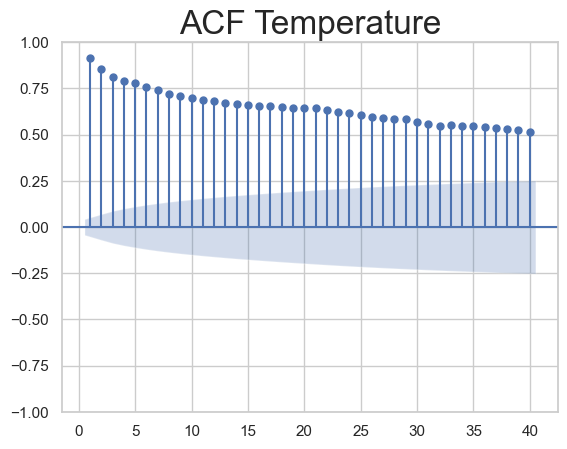

In [43]:
sgt.plot_acf(df[target_column], lags = 40, zero = False)
plt.title("ACF Temperature", size = 24)
plt.show()

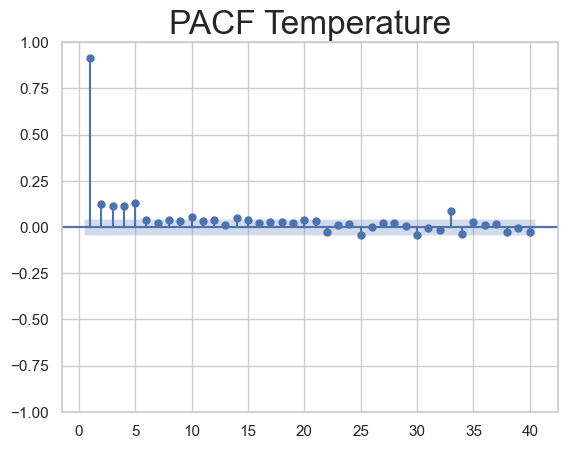

In [44]:
sgt.plot_pacf(df[target_column], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Temperature", size = 24)
plt.show()